In [89]:
import pandas as pd
import numpy as np
import datetime
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns

In [84]:
data = pd.read_csv('../data/owid-covid-data.csv')
world_data = data.fillna(value=0)
world_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89401,ZWE,Africa,Zimbabwe,2021-05-13,38491.0,25.0,13.286,1582.0,3.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
89402,ZWE,Africa,Zimbabwe,2021-05-14,38535.0,44.0,18.857,1582.0,0.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
89403,ZWE,Africa,Zimbabwe,2021-05-15,38554.0,19.0,20.000,1582.0,0.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
89404,ZWE,Africa,Zimbabwe,2021-05-16,38560.0,6.0,20.143,1582.0,0.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [85]:
world_data.fillna(value=0, inplace=True)
drop_index = []

for loc in world_data['location']:
    if loc in ['Asia', 'Africa', 'Europe', 'European Union', 'North America', 'South America', 'World']:
        drop_index.append(True)
    else:
        drop_index.append(False)

world_data.drop(world_data.index[drop_index], inplace=True)
world_data['date'] = pd.to_datetime(world_data['date'])

worldLast7Days = go.Figure()
last_date = np.max(world_data['date'])
week_ago = world_data[world_data['date'] >= last_date - datetime.timedelta(days=7)]
week_ago = week_ago[['location', 'new_cases']].groupby(by='location').sum()
week_ago.reset_index(inplace=True)
worldLast7Days.add_trace(go.Choropleth(locations=week_ago['location'],
                                       z=np.log(week_ago['new_cases']),
                                       locationmode='country names',
                                       text=week_ago['location'],
                                       colorscale=px.colors.sequential.speed))

worldLast7Days.update_geos(projection=dict(type='miller'),
                           lataxis=dict(range=[66.57, 50.046630]),
                           oceancolor='#262625',
                           showocean=True,
                           showlakes=False,
                           showcountries=True,
                           bgcolor='#262625',
                           showframe=False,
                           showsubunits=True
                           )

worldLast7Days.update_traces(showscale=False)

worldLast7Days.update_layout(xaxis=dict(showgrid=False,
                                        showline=False,
                                        color='white',
                                        zeroline=False),
                             yaxis=dict(showgrid=False,
                                        showline=False,
                                        color='white'),
                             showlegend=False,
                             paper_bgcolor='#262625',
                             plot_bgcolor='#262625',
                             height=500,
                             dragmode=False,
                             transition_duration=500,
                             margin=dict(t=0,b=0,l=0,r=0)
                             )
worldLast7Days.show()

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning:

divide by zero encountered in log



In [87]:
data[data['location'] == 'World'].columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

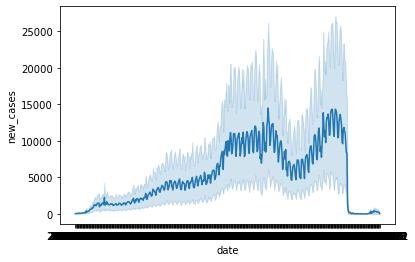

In [90]:
sns.lineplot(x=data['date'],y=data['new_cases'])

In [92]:
world_data[['location','new_cases','new_deaths']].groupby(by='location').max().reset_index()

,location,new_cases,new_deaths
0,Afghanistan,1485.0,46.0
1,Albania,1239.0,21.0
2,Algeria,1133.0,30.0
3,Andorra,299.0,6.0
4,Angola,392.0,18.0
...,...,...,...
214,Vietnam,296.0,3.0
215,Wallis and Futuna,0.0,0.0
216,Yemen,174.0,52.0
217,Zambia,1796.0,67.0
